# 直方图均衡化

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('lenna.png', 1) #It specifies to load a color image. Any transparency of image will be neglected.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('imgae_gray', gray)
cv2.waitKey()

-1

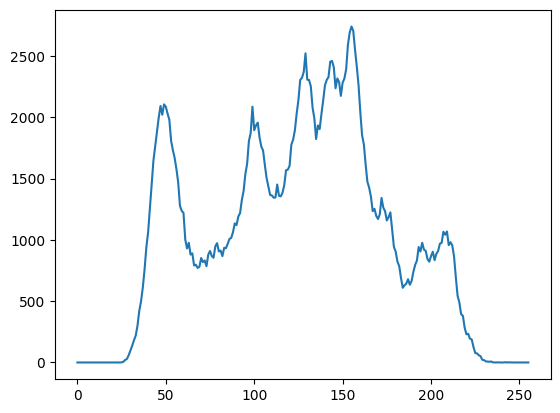

In [3]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.plot(hist)
plt.show()

In [4]:
dst = cv2.equalizeHist(gray)
cv2.imshow('Histogram Equalization', dst)
cv2.waitKey()

-1

# 实现高斯噪声

In [5]:
import random

In [6]:
def GaussianNoise(src, means, sigma, percentage):
    Noise_img = src
    Noise_num = int(percentage*src.shape[0]*src.shape[1])
    for i in range(Noise_num):
        random_x = random.randint(0, src.shape[0]-1)
        random_y = random.randint(0, src.shape[1]-1)
        Noise_img[random_x, random_y] = Noise_img[random_x, random_y] + random.gauss(means, sigma)
        if Noise_img[random_x, random_y] < 0:
            Noise_img[random_x, random_y] = 0
        elif Noise_img[random_x, random_y] > 255:
            Noise_img[random_x, random_y] = 255
    return Noise_img

In [7]:
img = cv2.imread('lenna.png', 0) #It specifies to load an image in grayscale mode.
img_new = GaussianNoise(img, 2, 4, 0.8)
cv2.imshow('lenna_GaussianNoise', np.hstack([gray, img_new]))
cv2.waitKey()

-1

# 实现椒盐噪声

In [8]:
def func(src, percentage):
    Noise_img = src
    Noise_num = int(percentage*src.shape[0]*src.shape[1])
    for i in range(Noise_num):
        random_x = random.randint(0, src.shape[0]-1)
        random_y = random.randint(0, src.shape[1]-1)
        if random.random()<=0.5:
            Noise_img[random_x, random_y] = 0
        else:
            Noise_img[random_x, random_y] = 255
    return Noise_img

In [9]:
img = cv2.imread('lenna.png', 0)
img_new = func(img, 0.2)
cv2.imshow('lenna_PepperandSalt', np.hstack([gray, img_new]))
cv2.waitKey()

-1